# I Installation 
(dans le cas d'une utilisation sur votre poste personnel)
Avant de commencer, assurez-vous d’avoir Scikit-learn installé (de préférence dans un environnement virtuel en utilisant conda) :
pip install scikit-learn

sinon, à l'insa : 

``` $ source /opt/venv/stpi-m8/bin/activate``` 

``` $ python -m ipykernel install --user --name M8``` 

``` $ jupyter notebook``` 

Nous utilisons un notebook Python. Cet outil est intéressant pour prototyper rapidement du code mais peut s'avérer difficile (car les cellules peuvent être lancées dans un ordre arbitraire et provoquer des effets de bord)

In [5]:
# import nécessaires pour ce TP 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dans Scikit-learn, les objets vont représenter des instantiations des différents modèles. Ce choix est un peu déroutant mais sera plus compréhensible quand nous ferons de la validation croisée notamment.

# II Estimators dans Scikit-learn

Un estimateur dans Scikit-learn est un objet qui peut apprendre à partir des données. Il suit toujours la structure suivante :

• .fit(X, y) → entraînement du modèle

• .predict(X) → prédiction

• .score(X, y) → évaluation du modèle


Nous allons illustrer cela avec une régression logistique sur le dataset Iris.

In [26]:
###Chargement du Dataset

iris = datasets.load_iris()
#help(datasets.load_iris())

X, y = iris.data, iris.target

#on aurait aussi pu faire
#X,y =  datasets.load_iris()

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print(df.head())
print(np.unique(y))

#Séparation des données en Train/Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Utilisation d’un Estimateur : Régression Logistique
from sklearn.linear_model import LogisticRegression

# Initialisation de l'estimateur
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy du modèle: {accuracy:.2f}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
[0 1 2]
Accuracy du modèle: 1.00


## Questions 
1. lisez la documentation des fonctions utilisées pour comprendre les choix (par défaut fait dans ce cas)
2. Quelles sont les spécificités du jeu de données ?
3. changez certains paramètres et évaluer leur impact.

In [42]:
#1 documentation + 2 spécificité du jeu de données

#help(datasets.load_iris)

#=================   ==============
#Classes                          3
#Samples per class               50
#Samples total                  150
#Dimensionality                   4
#Features            real, positive
#=================   ==============

iris = datasets.load_iris()
X, y = iris.data, iris.target

print(np.unique(y)) #[0 1 2] donc il y a 3 classes
print(np.mean(X, axis = 0))

#3 Changements de paramètres et évaluons l'impact de ce changement

#regréssion logistique

# help(LogisticRegression)

# |  C : float, default=1.0
# |      Inverse of regularization strength; must be a positive float.
# |      Like in support vector machines, smaller values specify stronger
# |      regularization.

model2 = LogisticRegression(penalty = 'l2',C = 0.1)
model2.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy du modèle: {accuracy:.2f}")

# ne marche que avec penalty l2
#C plus faible => régularisation plus forte

[0 1 2]
[5.84333333 3.05733333 3.758      1.19933333]
Accuracy du modèle: 1.00


# III Transformers dans Scikit-learn 

Dans Scikit-learn, un transformer (à ne pas confondre avec le réseau de neurones ...) est un objet qui modifie ou transforme les données avant qu’elles ne soient utilisées par un modèle d’apprentissage. Il suit une API standard avec trois méthodes principales :

1. .fit(X, y=None): Apprend les paramètres de transformation à partir des données (ex. calcul des moyennes pour la standardisation).

2. .transform(X): Applique la transformation aux données.

3. .fit_transform(X, y=None): Combine fit et transform pour effectuer les deux opérations en une seule étape.

Les transformers sont souvent utilisés pour le prétraitement des données, comme la normalisation, la réduction de dimension, l’encodage de variables catégorielles, ou encore la sélection de caractéristiques.

In [45]:
#On applique la normalisation (StandardScaler) :

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#pas à utiliser ici
X_test_scaled = scaler.transform(X_test)

#On entraîne maintenant le modèle sur les données transformées :
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)


accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy après normalisation : {accuracy_scaled:.2f}")

Accuracy après normalisation : 1.00


## Questions

1. Pourquoi la normalisation peut-elle améliorer les performances d’un modèle ?
2. Quelle transformation est appliquée par MinMaxScaler et que se passe-t-il si on applique cette transformation à la place ?
   On stockera les prédictions (a partir des données mises à l'échelle avec MinMaxScaler dans une variable ``` y_pred_minmax ``` 

In [49]:
# normalisation améliore performances d'un modèle
# met les caratéristiques à la même échelles => stabilité

In [55]:
#Expérimentation :
#Essayez MinMaxScaler et comparez les résultats.

# help(MinMaxScaler)

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
model.fit(X_train_minmax, y_train)
y_pred_minmax = model.predict(X_test_minmax)

accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

print(f"Accuracy MinMax : {accuracy_minmax:.2f}")

#Accuracy MinMaxScaler : 0.97 (97%)

Accuracy MinMax : 0.97


## IV Évaluation des Modèles

Après l’entraînement d’un modèle, il est crucial d’évaluer ses performances, ce que scikit-learn permet simplement.


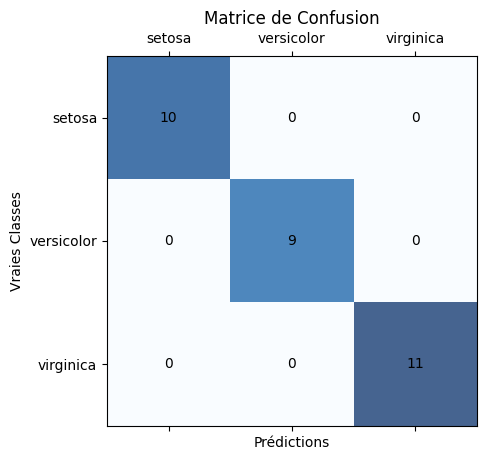

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [56]:
#Matrice de Confusion

cm = confusion_matrix(y_test, y_pred)
# Création d'une figure Matplotlib
fig, ax = plt.subplots()
ax.matshow(cm, cmap="Blues", alpha=0.75)  # Affichage sous forme de grille

# Annotation des valeurs dans la matrice
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', color="black")

# Ajout des labels
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.xticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)

plt.show()

#Rapport de Classification

print(classification_report(y_test, y_pred, target_names=iris.target_names))


## Rappel sur l'interprétation 

• La précision (precision) correspond à la capacité du modèle à ne pas générer de faux positifs.
• Le rappel (recall) mesure la capacité du modèle à identifier tous les vrais positifs.
• Le score F1 (f1-score) est une moyenne harmonique entre la précision et le rappel.

## Questions 
1. appliquer ce code sur la variable ``` y_pred_minmax ``` et expliquer le rapport fourni.

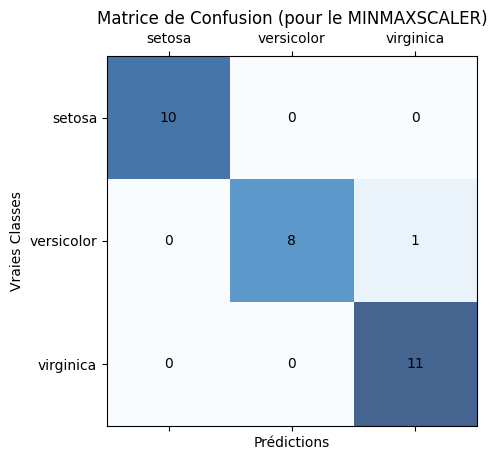

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [54]:
### Matrice de confuson pour la variable y_pred_minmax


cm_minmax = confusion_matrix(y_test, y_pred_minmax)

fig, ax = plt.subplots()
ax.matshow(cm_minmax, cmap="Blues", alpha=0.75)  # Affichage sous forme de grille

for i in range(cm_minmax.shape[0]):
    for j in range(cm_minmax.shape[1]):
        ax.text(x=j, y=i, s=cm_minmax[i, j], va='center', ha='center', color="black")

# Ajout des labels
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion (pour le MINMAXSCALER)")
plt.xticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)

plt.show()

print(classification_report(y_test, y_pred_minmax, target_names=iris.target_names))

#1 support dans versicolor/verginica 

## V Expérimentations Supplémentaires

Comparaison de plusieurs modèles (régression logistique, SVM (linéaire), k-plus proches voisins).
On pourra crééer une liste d'objets (contenant chaque classifieur) pour se faciliter la tâche.

In [20]:
#Ajoutez d’autres modèles et comparez leurs performances :
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Normalisation des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a completer ...
modele_reg = LogisticRegression()
modele_SVM
modele_kmeans


## Questions aux étudiants :

1. Quel modèle fonctionne le mieux sur ce dataset et pourquoi ?
2. Quel est l’impact de la normalisation sur chaque modèle ?
3. Quelle est la différence entre un modèle linéaire (Logistic Regression, SVM) et un modèle non linéaire (KNN) ?


## VI Conclusion et Ouverture

• Les estimateurs dans Scikit-learn suivent une interface commune (fit, predict, score).
• Les transformers permettent de prétraiter les données avant d’entraîner un modèle.
• L’évaluation des modèles se fait via des métriques comme la précision, le rappel et la matrice de confusion.
• Différents modèles peuvent donner des résultats très différents, et la normalisation peut grandement influencer les performances.

Si on souhaite implémenter une nouvelle méthode, on pourra créer un objet de la classe Estimator (ou Transformer) et préciser le traitement désiré dans les méthodes fit() et transform(). On pourra l'utiliser de manière transparent avec scikit-learn (et les métriques pourront être calculées et bien plus encore).

## Exercices Supplémentaires

1. Essayez d’autres datasets (wine, breast_cancer, blobs de Scikit-learn).
2. Testez d’autres méthodes de transformation des données (PolynomialFeatures, PCA).
3. Changer les paramètres par défaut des transformers et classifiers pour voir l'impact.